<a href="https://colab.research.google.com/github/tejaswinineelapu527-prog/ML-project/blob/main/MLworkshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Linear Regression

Linear Regression is a fundamental supervised learning algorithm used for predicting a continuous target variable based on one or more independent predictor variables. It assumes a linear relationship between the input variables and the output variable. The goal is to find the best-fitting straight line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between the observed and predicted values.

**Equation:**

$y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n + \epsilon$

Where:
- $y$ is the dependent variable (the target we want to predict).
- $x_1, x_2, ..., x_n$ are the independent variables (features).
- $b_0$ is the y-intercept.
- $b_1, b_2, ..., b_n$ are the coefficients (slopes) for the respective independent variables.
- $\epsilon$ is the error term.

In [ ]:
import pandas as pd
df = pd.read_csv('house_price.csv')
display(df.head())

,ID,Sq Ft (x),Price (y)
0,1,5.0,112
1,2,5.5,118
2,3,6.2,135
3,4,6.8,148
4,5,7.1,155


## 2. Polynomial Regression

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable $X$ and the dependent variable $y$ is modeled as an $n$-th degree polynomial. It's a special case of Linear Regression where we transform the input features into polynomial features before fitting a linear model. This allows us to model non-linear relationships.

**Equation (for a single feature):**

$y = b_0 + b_1x + b_2x^2 + ... + b_nx^n + \epsilon$

Where the terms $x, x^2, ..., x^n$ are the polynomial features.

In [ ]:
import pandas as pd
df = pd.read_csv('crop_yields.csv')
display(df.head())

,ID,Fertilizer (x),Yield (y)
0,1,0.5,5.2
1,2,0.8,8.1
2,3,1.1,12.5
3,4,1.3,15.0
4,5,1.6,18.8


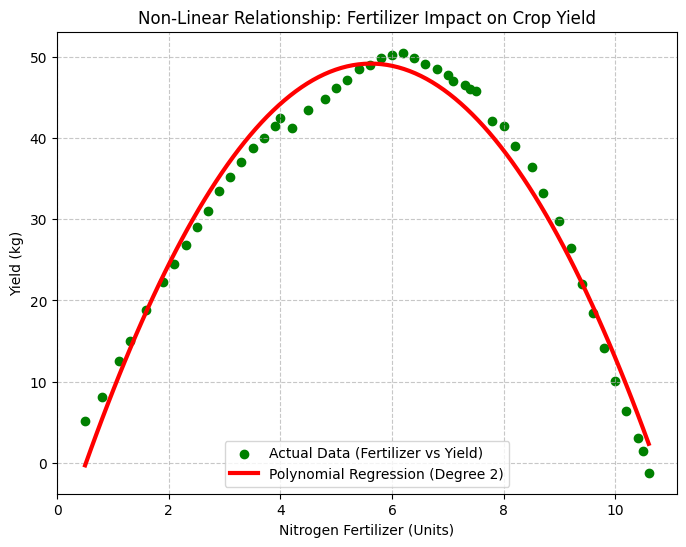

--- Polynomial Regression Model Evaluation ---
R2 Score: 0.9744
MAE on test set: 2.48
Mean Squared Error: 6.75


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# --- STEP 1: Load Data ---
df = pd.read_csv('crop_yields.csv')
X = df[['Fertilizer (x)']].values
y = df['Yield (y)'].values

# --- STEP 2: Feature Transformation ---
# Using poly_ prefix for the transformer
poly_transformer = PolynomialFeatures(degree=2)
X_poly = poly_transformer.fit_transform(X)

# --- STEP 3: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# --- STEP 4: Train the Model ---
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

# --- STEP 5: Visualizing the Curve ---
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
# Transform the range using the specific poly transformer
X_range_poly = poly_transformer.transform(X_range)
poly_y_curve = poly_model.predict(X_range_poly)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='green', label='Actual Data (Fertilizer vs Yield)')
plt.plot(X_range, poly_y_curve, color='red', linewidth=3, label='Polynomial Regression (Degree 2)')

plt.title('Non-Linear Relationship: Fertilizer Impact on Crop Yield')
plt.xlabel('Nitrogen Fertilizer (Units)')
plt.ylabel('Yield (kg)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# --- STEP 6: Metrics ---
poly_y_pred = poly_model.predict(X_test)
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_mae = mean_absolute_error(y_test, poly_y_pred)

print(f"--- Polynomial Regression Model Evaluation ---")
print(f"R2 Score: {poly_r2:.4f}")
print(f"MAE on test set: {poly_mae:.2f}")
print(f"Mean Squared Error: {poly_mse:.2f}")

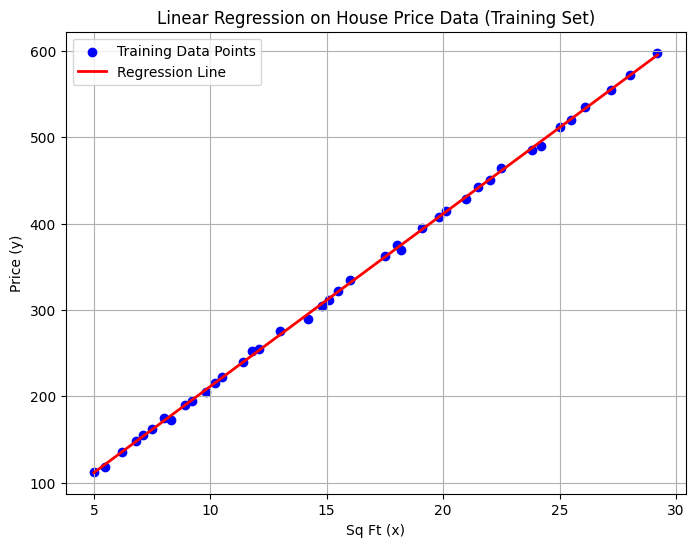


Test Data Points (Sq Ft, Actual Price, Predicted Price):
Sq Ft: 11.00, Actual: 235.00, Predicted: 231.37
Sq Ft: 23.10, Actual: 470.00, Predicted: 473.38
Sq Ft: 18.80, Actual: 390.00, Predicted: 387.38
Sq Ft: 26.80, Actual: 545.00, Predicted: 547.38
Sq Ft: 12.50, Actual: 262.00, Predicted: 261.37
Sq Ft: 28.50, Actual: 580.00, Predicted: 581.38
Sq Ft: 17.00, Actual: 355.00, Predicted: 351.38
Sq Ft: 16.50, Actual: 340.00, Predicted: 341.38
Sq Ft: 19.50, Actual: 405.00, Predicted: 401.38
Sq Ft: 13.50, Actual: 280.00, Predicted: 281.37

--- Linear Regression Evaluation Metrics ---
MSE on test set: 6.95
MAE on test set: 2.40
R2 score on test set: 1.00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Use data from house_price.csv
X = df['Sq Ft (x)'].values.reshape(-1, 1)
y = df['Price (y)'].values.reshape(-1, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on test set
lr_y_pred = lr_model.predict(X_test)

# Visualize results for training data and overall regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='blue', label='Training Data Points')

# Plot the regression line over a range that covers all data
lr_X_line = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
lr_y_line = lr_model.predict(lr_X_line)
plt.plot(lr_X_line, lr_y_line, color='red', linewidth=2, label='Regression Line')

plt.title('Linear Regression on House Price Data (Training Set)')
plt.xlabel('Sq Ft (x)')
plt.ylabel('Price (y)')
plt.legend()
plt.grid(True)
plt.show()

print("\nTest Data Points (Sq Ft, Actual Price, Predicted Price):")
for i in range(len(X_test)):
    print(f"Sq Ft: {X_test[i][0]:.2f}, Actual: {y_test[i][0]:.2f}, Predicted: {lr_y_pred[i][0]:.2f}")

# Calculate and print evaluation metrics using model-specific variables
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print(f"\n--- Linear Regression Evaluation Metrics ---")
print(f"MSE on test set: {lr_mse:.2f}")
print(f"MAE on test set: {lr_mae:.2f}")
print(f"R2 score on test set: {lr_r2:.2f}")

## 3. Linear Classifier

A Linear Classifier is a type of classifier that makes a classification decision based on a linear combination of its input features. It separates data points into different classes using a straight line (or a hyperplane in higher dimensions).

**Common Linear Classifiers include:**
- **Perceptron:** One of the simplest linear classifiers, used for binary classification. It learns a decision boundary by iteratively updating weights based on misclassified samples.
- **Support Vector Machines (SVMs) with a linear kernel:** A powerful classifier that finds the hyperplane that best separates the classes with the maximum margin.
- **Stochastic Gradient Descent (SGD) Classifier:** A more general classifier that can be configured to act as a linear classifier by choosing an appropriate loss function (e.g., `hinge` loss for linear SVM or `log_loss` for logistic regression).

For this example, we'll use `SGDClassifier` configured for linear classification (similar to a linear SVM).

In [ ]:
import pandas as pd
df = pd.read_csv('exam_result.csv')
display(df.head())

,ID,Hours (x1?),Attend (x2?),Result (y)
0,1,1.5,40,0
1,2,2.0,50,0
2,3,2.5,45,0
3,4,3.0,30,0
4,5,1.8,60,0


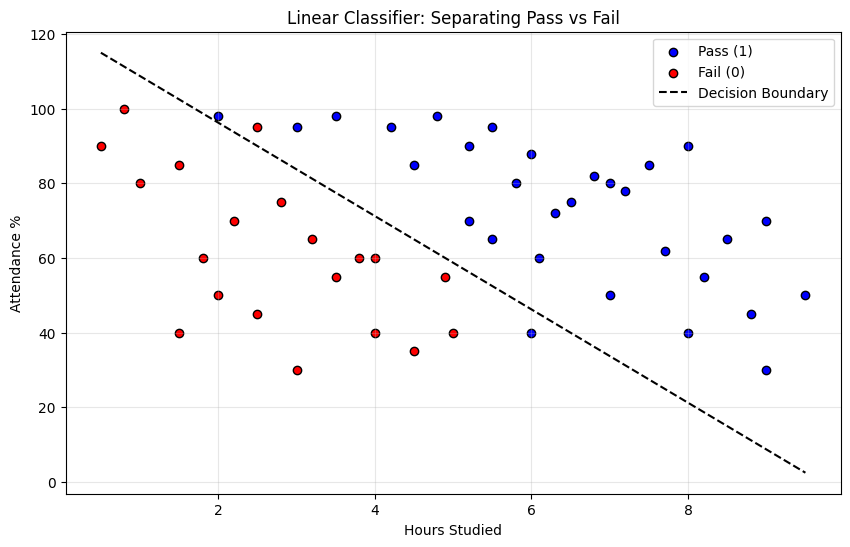

SVC Accuracy: 90.00%

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      1.00      0.93         7

    accuracy                           0.90        10
   macro avg       0.94      0.83      0.87        10
weighted avg       0.91      0.90      0.89        10



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# --- STEP 1: Load Data ---
df = pd.read_csv('exam_result.csv')

# Features: Hours Studied and Attendance %
X = df[['Hours (x1?)', 'Attend (x2?)']].values
# Target: Result (0 or 1)
y = df['Result (y)'].values

# --- STEP 2: Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 3: Train Linear SVM Classifier ---
# Using svc_ prefix for the model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# --- STEP 4: Visualize the Decision Boundary ---
plt.figure(figsize=(10, 6))

# Plot the data points
plt.scatter(df[df['Result (y)'] == 1]['Hours (x1?)'],
            df[df['Result (y)'] == 1]['Attend (x2?)'],
            color='blue', label='Pass (1)', edgecolors='k')

plt.scatter(df[df['Result (y)'] == 0]['Hours (x1?)'],
            df[df['Result (y)'] == 0]['Attend (x2?)'],
            color='red', label='Fail (0)', edgecolors='k')

# Create the decision boundary line using svc_model coefficients
svc_w = svc_model.coef_[0]
svc_b = svc_model.intercept_[0]
svc_x_points = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
svc_y_points = -(svc_w[0] * svc_x_points + svc_b) / svc_w[1]

plt.plot(svc_x_points, svc_y_points, 'k--', label='Decision Boundary')

plt.title('Linear Classifier: Separating Pass vs Fail')
plt.xlabel('Hours Studied')
plt.ylabel('Attendance %')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- STEP 5: Evaluate ---
# Using svc_ prefix for predictions and accuracy
svc_y_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)

print(f"SVC Accuracy: {svc_accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, svc_y_pred))

## 4. Logistic Regression

Despite its name, Logistic Regression is a statistical model used for **binary classification** (predicting one of two classes), not regression. It's a linear model that uses a logistic (sigmoid) function to map the output of a linear equation to a probability value between 0 and 1. This probability is then used to classify the instance.

**Key characteristics:**
- Outputs probabilities of belonging to a certain class.
- Uses the sigmoid activation function: $P(y=1|X) = \frac{1}{1 + e^{-(b_0 + b_1x_1 + ... + b_nx_n)}}$.
- The decision boundary is linear.
- Can be extended for multi-class classification (e.g., using One-vs-Rest).

Logistic Regression is widely used due to its interpretability and efficiency.

In [ ]:
import pandas as pd
df = pd.read_csv('credit_score.csv')
display(df.head())

,ID,Credit Score (x),Result (y)
0,1,450,0
1,2,480,0
2,3,510,0
3,4,530,0
4,5,550,0


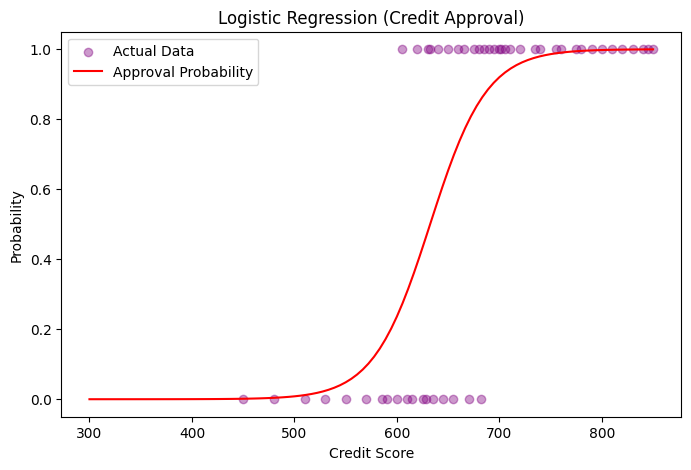

Logistic Regression Accuracy: 80.00%
Confusion Matrix:
 [[1 2]
 [0 7]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# 1. Prepare Data
df = pd.read_csv('credit_score.csv')
X = df[['Credit Score (x)']].values
y = df['Result (y)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Model
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# 3. Simple Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='purple', label='Actual Data', alpha=0.4)

# Plot the S-curve
log_X_range = np.linspace(300, 850, 100).reshape(-1, 1)
log_y_prob = log_model.predict_proba(log_X_range)[:, 1]
plt.plot(log_X_range, log_y_prob, color='red', label='Approval Probability')

plt.title('Logistic Regression (Credit Approval)')
plt.xlabel('Credit Score')
plt.ylabel('Probability')
plt.legend()
plt.show()

# 4. Evaluation
log_y_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_y_pred)
log_cm = confusion_matrix(y_test, log_y_pred)

print(f"Logistic Regression Accuracy: {log_accuracy:.2%}")
print("Confusion Matrix:\n", log_cm)

## 5. Decision Tree Classifier

A Decision Tree Classifier is a supervised machine learning algorithm used for both classification and regression tasks, but predominantly for classification. It works by recursively splitting the dataset into smaller and smaller subsets based on the values of the input features, eventually forming a tree-like structure of decisions.

### Principles:
1.  **Recursive Partitioning:** The core idea is to repeatedly split the data into two or more homogeneous sets based on the most significant differentiator in the input features.
2.  **Splitting Nodes:** Each split is represented by a 'node' in the tree. The top node is called the 'root node', internal nodes represent features or attributes, and leaf nodes (or terminal nodes) represent the class labels or decision outcomes.
3.  **Tree-like Structure:** The process continues until a stopping criterion is met, such as when all instances in a subset belong to the same class, or when the number of instances in a subset falls below a predefined threshold.

### Key Characteristics:
-   **Handles Both Numerical and Categorical Data:** Decision trees can work with both types of features directly, although sometimes numerical features are binned.
-   **Interpretability:** They are highly interpretable and easy to visualize, resembling human decision-making processes.
-   **Non-linear Relationships:** Capable of capturing complex non-linear relationships between features and the target variable.
-   **Feature Importance:** Decision trees inherently provide a measure of feature importance, showing which features are most influential in making predictions.
-   **Prone to Overfitting:** Without proper pruning or limiting tree depth, decision trees can easily overfit the training data, leading to poor generalization on unseen data.

### Important Terms in Decision Tree Construction:
-   **Entropy:** A measure of impurity or randomness in a set of samples. Higher entropy means more mixed classes.
-   **Gini Impurity:** Another measure of impurity, commonly used in algorithms like CART (Classification and Regression Trees). It quantifies the probability of misclassifying a randomly chosen element if it were randomly labeled according to the class distribution in the subset.
-   **Information Gain:** The reduction in entropy (or Gini impurity) achieved by a split. Decision tree algorithms typically choose the split that maximizes information gain, aiming to create the most homogeneous child nodes possible.

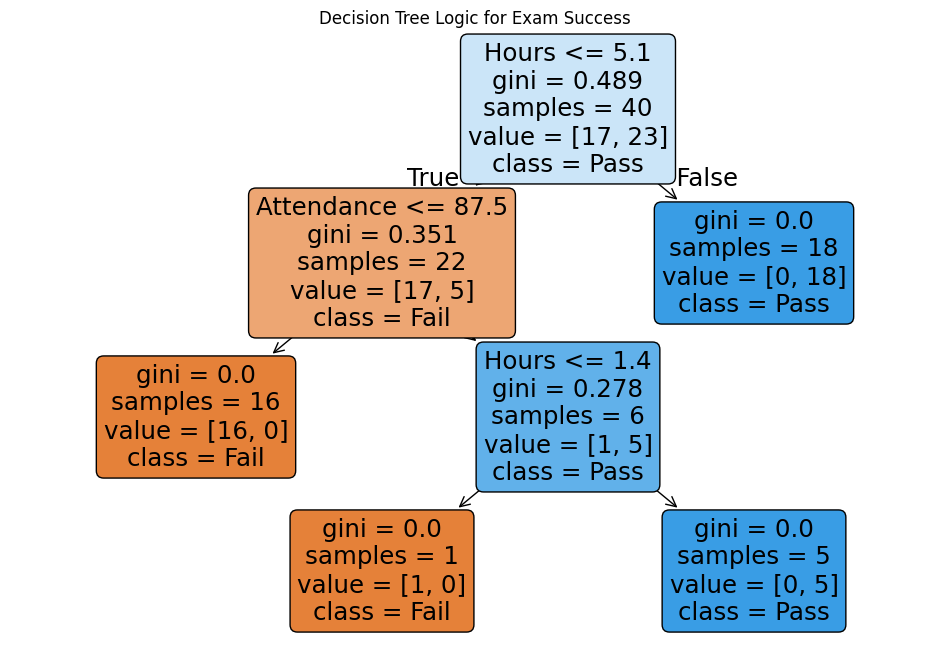

--- Decision Tree Evaluation ---
Accuracy: 80.00%
Importance of Hours: 0.69
Importance of Attendance: 0.31


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# --- STEP 1: Load Data ---
df = pd.read_csv('exam_result.csv')
X = df[['Hours (x1?)', 'Attend (x2?)']]
y = df['Result (y)']

# Split data to allow for accuracy calculation later
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- STEP 2: Train Model ---
# Using dt_ prefix for the model
dt_model = DecisionTreeClassifier(max_depth=3, criterion='gini')
dt_model.fit(X_train, y_train)

# --- STEP 3: Visualize the Tree ---
plt.figure(figsize=(12, 8))
plot_tree(dt_model,
          feature_names=['Hours', 'Attendance'],
          class_names=['Fail', 'Pass'],
          filled=True,
          rounded=True)
plt.title("Decision Tree Logic for Exam Success")
plt.show()

# --- STEP 4: Predictions and Accuracy ---
dt_y_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_y_pred)

# --- STEP 5: Feature Importance ---
dt_importance = dt_model.feature_importances_

print(f"--- Decision Tree Evaluation ---")
print(f"Accuracy: {dt_accuracy:.2%}")
print(f"Importance of Hours: {dt_importance[0]:.2f}")
print(f"Importance of Attendance: {dt_importance[1]:.2f}")

## 6. Decision Tree Regressor

A Decision Tree Regressor is a supervised machine learning algorithm used for **regression tasks**, meaning it predicts a continuous target variable. Similar to Decision Tree Classifiers, it builds a tree-like model of decisions, but instead of predicting a class label, it predicts a numerical value.

### Principles:
1.  **Recursive Partitioning:** The algorithm recursively splits the data into smaller, more homogeneous subsets based on input features. Each split aims to minimize the impurity (variance) within the resulting child nodes.
2.  **Splitting Nodes:** Each internal node in the tree represents a test on an attribute, and each branch represents the outcome of the test. Leaf nodes (terminal nodes) represent the predicted continuous value (e.g., the average of the target values of the observations falling into that leaf).
3.  **Handling Numerical Target Variables:** Unlike classification trees that aim for homogeneous classes, regression trees aim for nodes with similar target values, often minimizing the Mean Squared Error (MSE) or Mean Absolute Error (MAE) for the values within each node.

### Key Characteristics:
-   **Interpretability:** Decision tree regressors are highly intuitive and easy to visualize, making their decision-making process transparent.
-   **Handles Both Numerical and Categorical Data:** They can naturally handle both types of features without extensive preprocessing.
-   **Non-linear Relationships:** Capable of capturing complex, non-linear relationships between input features and the continuous target variable.
-   **Feature Importance:** Provides a straightforward way to understand which features are most influential in predicting the target variable.
-   **Prone to Overfitting:** Without proper pruning or limiting the tree's depth, a decision tree regressor can easily overfit the training data, leading to poor generalization on unseen data.
-   **Output is Discrete:** Even though it predicts a continuous value, the output of a decision tree regressor is an average (or median) of the target values in the leaf node, meaning it can only predict values present in the training set or averages thereof, not entirely new values outside this range.

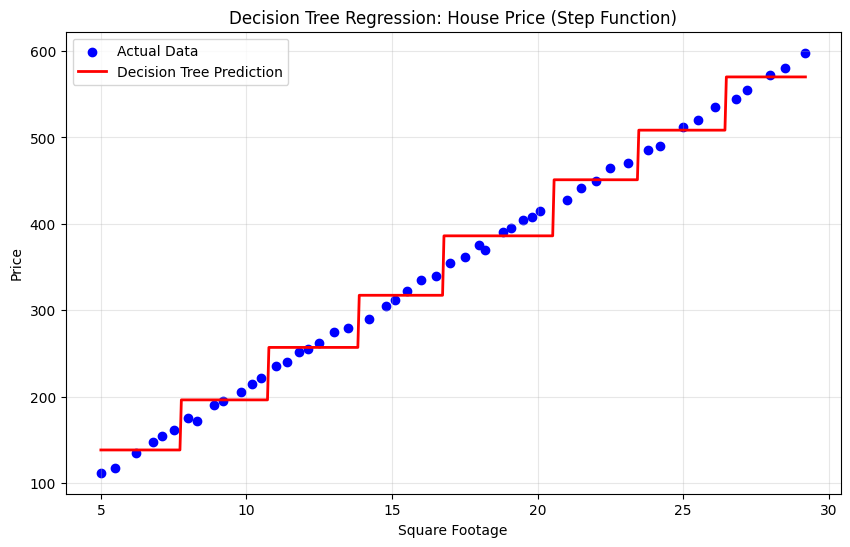

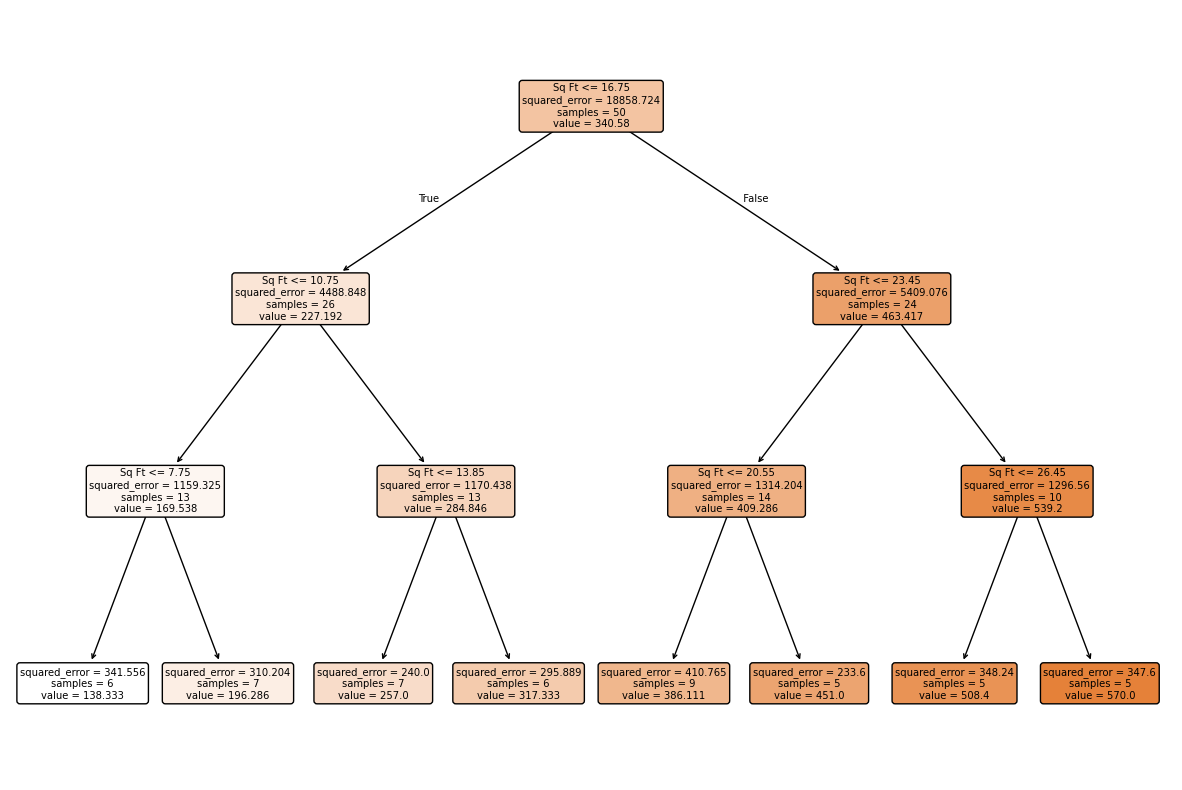

--- Decision Tree Regressor Evaluation ---
R2 Score: 0.9830
MSE: 320.40


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# --- 1. Load Data ---
df = pd.read_csv('house_price.csv')
X = df[['Sq Ft (x)']].values
y = df['Price (y)'].values

# --- 2. Train Model ---
# Using dtr_ prefix for the model
dtr_model = DecisionTreeRegressor(max_depth=3)
dtr_model.fit(X, y)

# --- 3. Visualize the "Step" Prediction ---
dtr_X_range = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
dtr_y_pred_range = dtr_model.predict(dtr_X_range)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(dtr_X_range, dtr_y_pred_range, color='red', linewidth=2, label='Decision Tree Prediction')

plt.title('Decision Tree Regression: House Price (Step Function)')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 4. Visualize the Tree Logic ---

plt.figure(figsize=(15, 10))
plot_tree(dtr_model,
          feature_names=['Sq Ft'],
          filled=True,
          rounded=True)
plt.show()

# --- 5. Metrics ---
# Using dtr_ prefix for predictions and R2 score
dtr_y_pred = dtr_model.predict(X)
dtr_r2 = r2_score(y, dtr_y_pred)
dtr_mse = mean_squared_error(y, dtr_y_pred)

print(f"--- Decision Tree Regressor Evaluation ---")
print(f"R2 Score: {dtr_r2:.4f}")
print(f"MSE: {dtr_mse:.2f}")

# 7. Support Vector Machines (SVM)
Support Vector Machines (SVMs) are powerful and versatile machine learning algorithms capable of performing linear or non-linear classification, regression, and even outlier detection. SVMs are particularly effective in high-dimensional spaces and cases where the number of dimensions is greater than the number of samples.
### The Core Idea: Hyperplanes and Margins
The fundamental concept behind SVM is to find the "best" hyperplane that separates different classes of data points in a classification problem. A hyperplane is simply a decision boundary that divides the input space into two regions, with each region corresponding to a class. In a 2D space, a hyperplane is a line; in a 3D space, it\'s a plane; and in higher dimensions, it\'s a hyperplane.
**Key concepts:**
1.  **Hyperplane:** A decision boundary that separates the data points of different classes.
2.  **Support Vectors:** These are the data points that lie closest to the decision boundary (hyperplane). They are the most difficult-to-classify points and play a crucial role in defining the orientation and position of the hyperplane. If you remove the support vectors, the hyperplane would change.
3.  **Margin:** The distance between the hyperplane and the nearest data point from either class (the support vectors). The goal of an SVM is to find a hyperplane that maximizes this margin. A larger margin generally means a lower generalization error and a more robust classifier.\n\n<p align="center">\n  <img src="https://upload.wikimedia.org/wikipedia/commons/2/2a/Svm_max_sep_hyperplane_with_margin.png" alt="SVM Hyperplane and Margin" width="500">\n</p>
### Types of SVMs
   **Linear SVM:** When the data points can be perfectly separated by a straight line (or a hyperplane).
   **Non-linear SVM:** When the data points are not linearly separable, SVMs use a technique called the "kernel trick." The kernel trick transforms the input data into a higher-dimensional feature space where it becomes linearly separable. Common kernel functions include Polynomial, Radial Basis Function (RBF) or Gaussian, and Sigmoid.', cell_id='Explain SVM')

## Support Vector Classifier (SVC)

### Principles of SVC:
Support Vector Classifier (SVC) is a powerful, supervised machine learning algorithm used for classification tasks. It's a type of Support Vector Machine (SVM) specifically designed for classification. The core principle of SVC is to find an optimal hyperplane that best separates data points of different classes in a high-dimensional space.

For **linearly separable data**, SVC aims to find the hyperplane that maximizes the margin between the closest data points of different classes. These closest points are called **support vectors**, and the region between the parallel hyperplanes passing through them is the **margin**. A larger margin generally leads to better generalization performance.

For **non-linearly separable data**, SVC employs a technique called the **kernel trick**. This involves implicitly mapping the original input features into a higher-dimensional feature space where the data points become linearly separable. Once in this higher-dimensional space, a linear hyperplane can be found to separate the classes. The kernel function calculates the dot product of feature vectors in the high-dimensional space without explicitly transforming them, making it computationally efficient.

### Key Characteristics:
*   **Margin Maximization:** SVC's primary goal is to maximize the margin between classes, which often leads to robust decision boundaries.
*   **Support Vectors:** Only the support vectors influence the position and orientation of the decision boundary. This makes SVC relatively robust to outliers that are not support vectors.
*   **High Dimensionality:** Effective in high-dimensional spaces, especially when the number of dimensions is greater than the number of samples.
*   **Kernel Trick:** Enables the algorithm to handle non-linear decision boundaries by using various kernel functions.
*   **Versatility:** Can be used for both binary and multi-class classification (e.g., using One-vs-One or One-vs-Rest strategies).

### Common Kernel Types:
*   **Linear Kernel:** Suitable for linearly separable data. `K(x, x') = x . x'`
*   **Polynomial Kernel:** Useful for non-linear relationships. `K(x, x') = (γx . x' + r)^d`
*   **Radial Basis Function (RBF) / Gaussian Kernel:** A very popular choice for non-linear classification, capable of handling complex decision boundaries. `K(x, x') = exp(-γ||x - x'||^2)`
*   **Sigmoid Kernel:** Often used in neural networks. `K(x, x') = tanh(γx . x' + r)`

### Advantages:
*   Effective in high-dimensional spaces.
*   Memory efficient because it uses a subset of training points in the decision function (support vectors).
*   Versatile due to various kernel functions.
*   Robust to outliers if they are not support vectors.

### Disadvantages:
*   Can be computationally expensive, especially with large datasets, as training time scales with the number of samples.
*   Requires careful tuning of kernel parameters (e.g., `C` and `gamma`).
*   Direct probability estimates are not inherent to the standard SVC; they require additional calibration methods.
*   Less interpretable than models like Decision Trees.

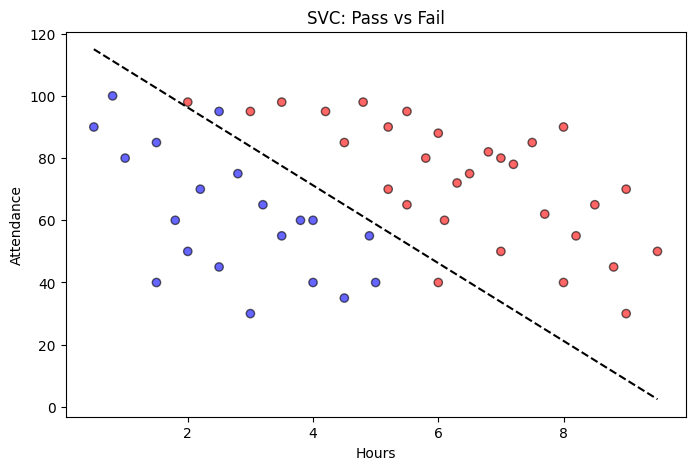

SVC Accuracy: 90.00%


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 1. Prepare Data
df = pd.read_csv('exam_result.csv')
X = df[['Hours (x1?)', 'Attend (x2?)']].values
y = df['Result (y)'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Train Model
svc_model = SVC(kernel='linear')
svc_model.fit(X_train, y_train)

# 3. Simple Visualization
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', alpha=0.6)

# Plot Decision Boundary
svc_w = svc_model.coef_[0]
svc_b = svc_model.intercept_[0]
svc_x_plot = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
svc_y_plot = -(svc_w[0] * svc_x_plot + svc_b) / svc_w[1]

plt.plot(svc_x_plot, svc_y_plot, 'k--', label='Boundary')
plt.title('SVC: Pass vs Fail')
plt.xlabel('Hours')
plt.ylabel('Attendance')
plt.show()

# 4. Evaluation
svc_y_pred = svc_model.predict(X_test)
svc_accuracy = accuracy_score(y_test, svc_y_pred)

print(f"SVC Accuracy: {svc_accuracy:.2%}")

## Support Vector Regressor (SVR)

Support Vector Regressor (SVR) is a supervised machine learning algorithm used for **regression tasks**, meaning it predicts a continuous target variable. While it shares many principles with Support Vector Classifiers (SVC), its goal is to predict a numerical value rather than a class label.

### Principles of SVR:
SVR aims to find a function that deviates from the training data by a margin epsilon (ε) at most, while also being as flat as possible. This is in contrast to SVC, which seeks a hyperplane to separate classes with the widest possible margin.

1.  **Objective Function:** Instead of minimizing misclassification, SVR minimizes the error within a certain threshold (ε-insensitive tube) and simultaneously maximizes the flatness of the function (minimizing the weights).
2.  **ε-Insensitive Tube:** This is a key concept unique to SVR. The model tries to fit the 'best' line (or hyperplane) such that the maximum number of data points fall *within* an epsilon-tube around the predicted function. Errors within this tube are ignored, and only errors outside the tube are penalized. This makes SVR robust to noise within the ε margin.
    *   Points inside the tube have zero cost.
    *   Points outside the tube incur a penalty that increases linearly with their distance from the tube boundary.
3.  **Support Vectors:** Similar to SVC, SVR also relies on support vectors. These are the data points that lie on or outside the ε-tube. They are the critical data points that define the regression function.

### How SVR Differs from SVC:
-   **Output:** SVC predicts discrete class labels, while SVR predicts continuous numerical values.
-   **Error Metric:** SVC aims to correctly classify points outside the margin. SVR aims to keep points *within* an ε-tube, penalizing only errors outside this tube.
-   **Loss Function:** SVR uses an ε-insensitive loss function, which makes it robust to small deviations from the true value.

### Key Characteristics:
*   **Handles Non-linearity:** Like SVC, SVR can use the "kernel trick" (e.g., linear, polynomial, RBF, sigmoid kernels) to model non-linear relationships between features and the target variable by mapping data into higher-dimensional feature spaces.
*   **Margin of Tolerance (ε):** The epsilon parameter defines the tolerance level for errors. Choosing an appropriate ε is crucial for model performance.
*   **Regularization Parameter (C):** Controls the trade-off between the flatness of the function and the amount of deviation tolerated. A small C leads to a flatter function (more regularization) but might tolerate more errors, while a large C tries to fit the training data more closely, potentially leading to overfitting.
*   **Support Vectors:** Only a subset of the training data (the support vectors) is used to define the regression function, making it memory efficient.

### Common Kernel Types:
*   **Linear Kernel:** For cases where the relationship is approximately linear.
*   **Polynomial Kernel:** Captures polynomial relationships.
*   **Radial Basis Function (RBF) / Gaussian Kernel:** A very common and powerful choice for non-linear regression, capable of handling complex, non-linear patterns.
*   **Sigmoid Kernel:** Can be used, though less common in regression than RBF.

### Advantages:
-   **Effective in High-Dimensional Spaces:** Can perform well even when the number of features is large.
-   **Robust to Outliers:** The ε-insensitive loss function makes it less sensitive to noise and outliers within the epsilon margin.
-   **Memory Efficient:** Only a subset of training data (support vectors) is used in the decision function.
-   **Versatile:** Due to the kernel trick, it can model complex non-linear relationships.

### Disadvantages:
-   **Parameter Tuning:** Performance heavily depends on the correct choice of kernel and hyper-parameters (C, ε, kernel-specific parameters like `gamma` for RBF).
-   **Computationally Intensive:** Can be slow to train on large datasets due to its computational complexity.
-   **Less Interpretable:** Understanding the coefficients and their direct impact on predictions is harder compared to simpler models like Linear Regression or Decision Trees.
-   **Scalability:** Not well-suited for very large datasets without specialized implementations.

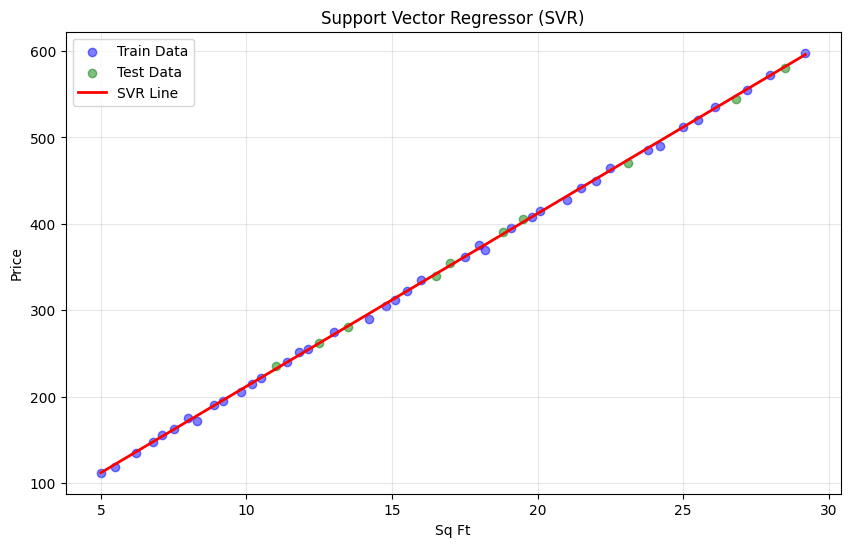

--- SVR Evaluation Metrics ---
MSE: 6.77
MAE: 2.40
R2 Score: 1.00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# --- 1. Load Data ---
df = pd.read_csv('house_price.csv')
X = df['Sq Ft (x)'].values.reshape(-1, 1)
y = df['Price (y)'].values

# --- 2. Split Data ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 3. Train Model ---
# Using svr_ prefix for the model
svr_model = SVR(kernel='linear', C=100, epsilon=0.1)
svr_model.fit(X_train, y_train)

# --- 4. Simple Visualization ---
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Train Data', alpha=0.5)
plt.scatter(X_test, y_test, color='green', label='Test Data', alpha=0.5)

# Generate and plot the SVR line
svr_X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
svr_y_line = svr_model.predict(svr_X_range)
plt.plot(svr_X_range, svr_y_line, color='red', linewidth=2, label='SVR Line')

plt.title('Support Vector Regressor (SVR)')
plt.xlabel('Sq Ft')
plt.ylabel('Price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 5. Evaluation ---
# Using svr_ prefix for predictions and metrics
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_mae = mean_absolute_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

print(f"--- SVR Evaluation Metrics ---")
print(f"MSE: {svr_mse:.2f}")
print(f"MAE: {svr_mae:.2f}")
print(f"R2 Score: {svr_r2:.2f}")

In [ ]:
# --- Accuracy for Exam Result Models ---
print("--- EXAM RESULT MODELS (Accuracy) ---")
print(f"Logistic Regression:  {log_accuracy:.2%}")
print(f"Decision Tree:        {dt_accuracy:.2%}")
print(f"Linear SVC:           {svc_accuracy:.2%}")

# --- R2 Score for House Price Models ---
print("\n--- HOUSE PRICE MODELS (R2 Score) ---")
print(f"Linear Regression:    {lr_r2:.4f}")
print(f"Decision Tree Reg:    {dtr_r2:.4f}")
print(f"SVR (Linear):         {svr_r2:.4f}")

--- EXAM RESULT MODELS (Accuracy) ---
Logistic Regression:  80.00%
Decision Tree:        80.00%
Linear SVC:           90.00%

--- HOUSE PRICE MODELS (R2 Score) ---
Linear Regression:    0.9994
Decision Tree Reg:    0.9830
SVR (Linear):         0.9994


In [ ]:
import pandas as pd
df = pd.read_csv('teams.csv')
display(df.head())

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# 1. Load data
df = pd.read_csv('teams.csv')

# 2. Preprocessing: Create a binary label (1 if medals > 0, else 0)
df['won_medal'] = (df['medals'] > 0).astype(int)

# Select features (dropping non-numeric or future-leakage columns)
features = ['events', 'athletes', 'age', 'height', 'weight', 'prev_medals']
X = df[features].fillna(0)  # Handle missing values
y = df['won_medal']

# 3. Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Feature Scaling (Crucial for SVC!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Initialize and Train the SVC
# We use 'rbf' kernel by default; 'probability=True' allows us to see confidence
model = SVC(kernel='rbf', C=1.0, gamma='scale')
model.fit(X_train_scaled, y_train)

# 6. Make Predictions and Evaluate
predictions = model.predict(X_test_scaled)

print("--- Classification Report ---")
print(classification_report(y_test, predictions))

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       257
           1       0.94      0.81      0.87       172

    accuracy                           0.90       429
   macro avg       0.91      0.89      0.90       429
weighted avg       0.91      0.90      0.90       429



In [ ]:
import pandas as pd

# 1. Define the feature names used during training
feature_names = ['events', 'athletes', 'age', 'height', 'weight', 'prev_medals']

# 2. Create the new data as a DataFrame
new_country_df = pd.DataFrame([[20, 30, 25, 175.0, 70.0, 2]], columns=feature_names)

# 3. Scale and Predict
new_country_scaled = scaler.transform(new_country_df)
new_country_predict = model.predict(new_country_scaled)

print(f"Prediction: {new_country_predict}")

Prediction: [0]
